# Lab 1: **Implementing Linear Regression**
## Student **|** ID: **Percival Mahwaya | 41701**
## Subject: **Advanced AI Methods of AI**
## Department: **Applied Sciences	| Computer Science II (Data Scientist)**
## Professor: **dr in˙z. Godlove Kuaban**

# Lab 1. Implementing Linear Regression.

* I build and train a linear regression model using TensorFlow. The California Housing dataset was used in acccordance to the task's instruction. This ipynb file reports the math, the training setup, and the results as per expectations.

# The following is what I deliver:

## A. Report content inside this notebook

* Theory with formulas

* Preprocessing explanation

* Model description

* Results and interpretation

## B. Source code inside this notebook

* Data loading and preprocessing

* Model implementation

* Training loop

* Evaluation

* Plotting

## C. Figures inside this notebook

* Training loss curve

* True vs predicted scatter plot

## Linear Regression Model

Prediction function:

$$\hat{y} = ax + b$$

For multivariate regression:

$$\hat{y} = Xw + b$$

Where
- $X$ is the feature matrix $(n \times d)$
- $w$ is the weights vector $(d \times 1)$
- $b$ is the bias (scalar)
- $\hat{y}$ is the predicted output $(n \times 1)$


## Cost Function: Mean Squared Error (MSE)

Loss:

$$J(w,b) = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i - y_i)^2$$

Why I picked the MSE
- It penalizes larger errors more because of squaring
- It is differentiable, so gradient-based optimization works
- It fits continuous target prediction



## Gradient Descent Optimization

Updated rules:

$$w := w - \alpha \frac{\partial J}{\partial w}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$

Derivatives (vector form):

$$\frac{\partial J}{\partial w} = \frac{2}{n}X^{T}(Xw + b - y)$$
$$\frac{\partial J}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}((Xw + b)_i - y_i)$$

Where
- $\alpha$ is the learning rate
- $n$ is the number of samples


In [1]:
# Task 1: Loading and preprocessing the dataset

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reproducibility
seed = 42
np.random.seed(seed)

# Load data
data = fetch_california_housing()
X = data.data
y = data.target  # median house value in $100,000s

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Feature names:", data.feature_names)

# Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed
)

# Normalizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TensorFlow prefers float32
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

print("Train:", X_train_scaled.shape, y_train.shape)
print("Test:", X_test_scaled.shape, y_test.shape)

X shape: (20640, 8)
y shape: (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Train: (16512, 8) (16512,)
Test: (4128, 8) (4128,)


In [2]:
# Task 2: Building a Linear Regression model with TensorFlow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.random.set_seed(seed)

# One linear layer
model = keras.Sequential([
    layers.Dense(1, activation="linear", input_shape=(X_train_scaled.shape[1],))
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss="mse"
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9173 - val_loss: 0.6985
Epoch 2/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5555 - val_loss: 0.5967
Epoch 3/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5259 - val_loss: 0.5577
Epoch 4/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5187 - val_loss: 0.5463
Epoch 5/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5180 - val_loss: 0.5449
Epoch 6/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5185 - val_loss: 0.5453
Epoch 7/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5191 - val_loss: 0.5455
Epoch 8/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5196 - val_loss: 0.5456
Epoch 9/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5200 - val_loss: 0.5456
Epoch 10/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5203 - val_loss: 0.5457
Epoch 11/150
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5205 - val_loss: 0.5459
Epoch 12/150
413/413 ━━━━━━━━━━━━━━━━━━━━

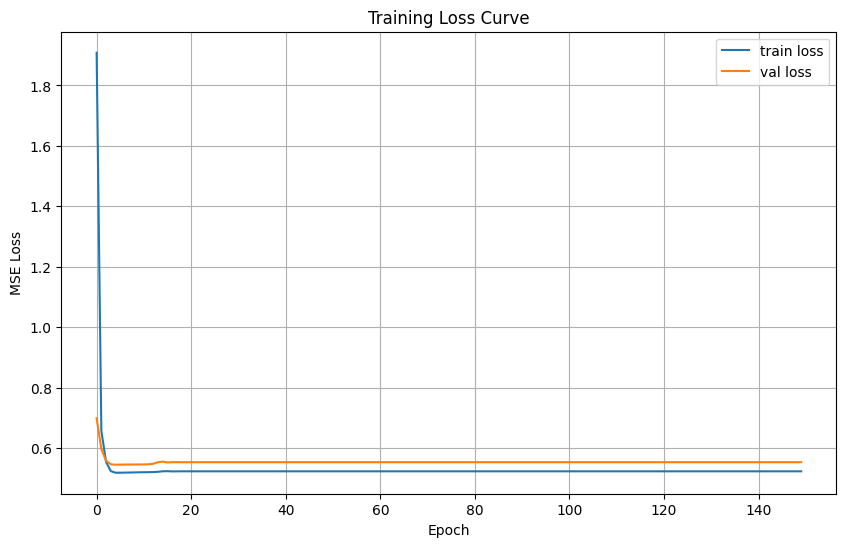

In [3]:
# Task 3: Training the model (>= 100 epochs)

import matplotlib.pyplot as plt

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    verbose=1
)

# Required plot 1: Training Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()


Test MSE: 0.5528106689453125


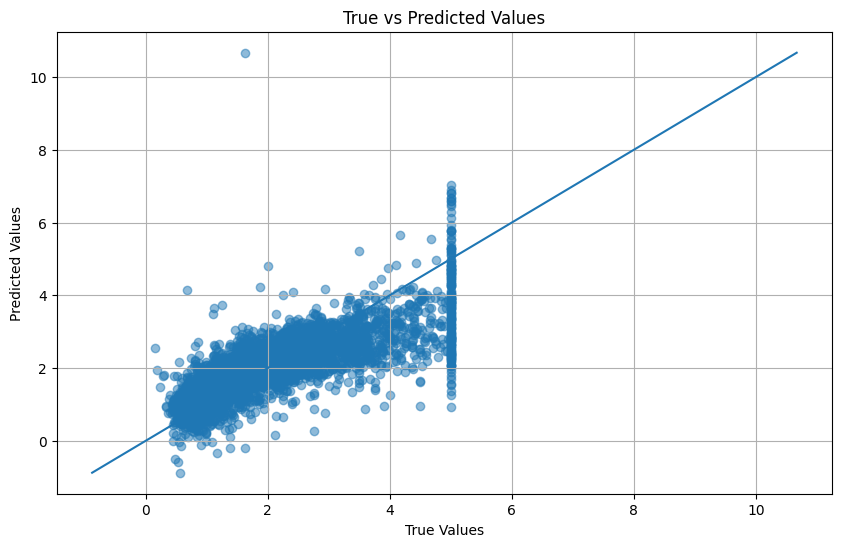

In [4]:
# Task 4: Evaluating the model and plots

test_mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test MSE:", test_mse)

y_pred = model.predict(X_test_scaled, verbose=0).reshape(-1)

# Required plot 2: True vs Predicted Values scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
min_v = float(min(y_test.min(), y_pred.min()))
max_v = float(max(y_test.max(), y_pred.max()))
plt.plot([min_v, max_v], [min_v, max_v])
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.grid(True)
plt.show()


# Task 5: Results interpretation

I loaded the California Housing dataset and worked with 8 input features and 1 target.
- X shape: (20640, 8)
- y shape: (20640,)
- Train split: (16512, 8) and (16512,)
- Test split: (4128, 8) and (4128,)

I normalized the features with StandardScaler and I saw faster, steadier training after scaling.

I was training a single-layer linear model (Dense with 1 output), so I was fitting a straight-line relationship in 8D feature space.
- Total parameters: 9 (8 weights + 1 bias)

I monitored the loss curve and I was seeing a sharp drop in the first epochs, then I was seeing a long plateau.
- Train loss was settling around 0.52 MSE
- Validation loss was settling around 0.55 MSE
This pattern was showing limited model capacity, since both curves were flattening at a similar level.

I was evaluating on the test set and I was getting:
- Test MSE: 0.5528

I was inspecting the True vs Predicted scatter plot and I was comparing points to the diagonal reference line.
- I was seeing a wide spread around the diagonal, so I was seeing notable prediction error.
- I was seeing underprediction for higher true values, with predictions staying lower than the diagonal at the right side of the plot.
- I was seeing a vertical band at True Values near 5.0, so I was observing the target cap effect in the dataset.
Overall, I was seeing a reasonable baseline fit for a linear model, and I was also seeing systematic bias at the high end of the target range.


# Conclusion

I was implementing linear regression in TensorFlow and I was training it on the California Housing dataset with scaled features.
I was completing the full pipeline: data loading, preprocessing, train and test split, model build, training, evaluation, and plots as per task instructions.

I was achieving a stable training process and I was reaching a test MSE around 0.5528.
I was observing early convergence and I was observing a plateau in both training and validation loss, so I was interpreting this as model underfitting from limited linear capacity.

I was analyzing the prediction plot and I was noticing two key behaviors.
- I was seeing predictions tracking the overall trend but with high scatter.
- I was seeing weaker performance at higher house values, and I was seeing the target cap near 5.0 influencing the shape of the plot.

I was treating this model as a baseline. I was planning improvements by adding non-linear capacity, feature interactions, or regularization tuning, so I was aiming to reduce the plateau level while keeping validation loss stable.
